  # GRAPH THEORY HOMEWORK 1

In [1]:
#SALİH GÜNDÜZ & SARP KILIÇKAP

#########################
import numpy as np
import matplotlib.pyplot as plt
from networkx import nx
from scipy.stats import spearmanr
import itertools
import seaborn as sns; 
import networkx.algorithms.community as nx_comm
import random
#import any other  modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################


# !!! Important: Because of computational power node count selected 50.

## Part A Simulate random weighted and unweighted networks

### Erdos&Renyi(ER):

Erdos-Renyi is a random graph G(n,p). n is node count and p is probability to connect any pair of nodes. 
1. For all nodes;
2. For each unique pair i,j get a random number
    Connect the actual pair given probability score.
At each time we will get different graphs. 

   $$ \text{Possible  edges} = \binom{n}{2} $$

In Brief:

•	User decide nodes.

•	User decides probability .

•	Create an empty graph

•	Add edges the graph randomly.

    •	Take a pair of nodes.
    
    •   Get Random number r
    
    •	If r is small than p add edge, else ignore
    
    •	repeat for all pairs.


Not:Networkx library functions are used for implementations. 

####  Small unweighted Erdos Renyi(ER) graph

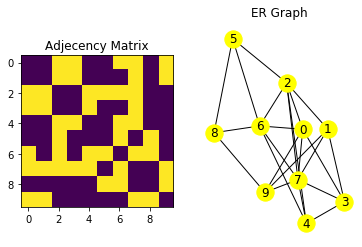

In [7]:

n = 10  # 10 nodes
p = 0.5  # probability.
G_unweighted = nx.erdos_renyi_graph(n, p)
Adj = nx.adjacency_matrix(G_unweighted).toarray()
fig, axs = plt.subplots(1,2)
nx.draw(G_unweighted, node_color="yellow", with_labels=True)
axs[0].imshow(Adj)
axs[0].set_title('Adjecency Matrix')
axs[1].set_title('ER Graph')
plt.show()


####  Small weighted Erdos Renyi(ER) graph

First ER graph created, then weighted are assigned randomly.

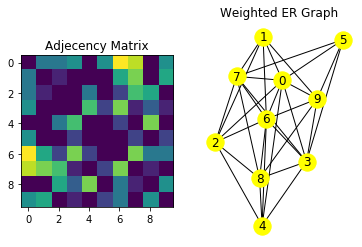

In [8]:
import random
n = 10  #
p = 0.6  #
G_weighted = nx.erdos_renyi_graph (n, p)
for (n,v,w) in G_weighted.edges(data=True):
    w['weight'] = random.randint(0,10)
Adj = nx.adjacency_matrix(G_weighted).toarray()
fig, axs = plt.subplots(1,2)
nx.draw(G_weighted, node_color="yellow", with_labels=True)
axs[0].imshow(Adj)
axs[0].set_title('Adjecency Matrix')
axs[1].set_title('Weighted ER Graph')
plt.show()



### Maslov-Sneppen (MS): 
Maslov-Sneppen algorithm constructs a null graph of a given network preserving the degrees of each of its nodes.Such randomized counterpart of a given complex network can be used to identify its  important non-random topological patterns, which are significantly over- (or under-) represented in the real network compared to this null-model.4 x (number of edges) times) of the elementary rewiring step shown below:

<img src="ms.JPG">


Image is taken from https://maslov.bioengineering.illinois.edu/matlab.htm
It is implemented with networkx library.

https://networkx.org/documentation/stable/_modules/networkx/algorithms/smallworld.html#random_reference.



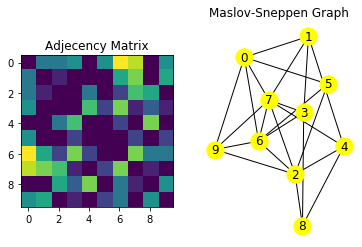

In [9]:
Small_MS=nx.random_reference(G_unweighted, niter=1, connectivity=True, seed=None)
fig, axs = plt.subplots(1,2)
nx.draw(Small_MS, node_color="yellow", with_labels=True)
axs[0].imshow(Adj)
axs[0].set_title('Adjecency Matrix')
axs[1].set_title('Maslov-Sneppen Graph')
plt.show()

## Part B: Analyzing Erdos-Renyi and Maslov-Sneppen graphs using centrality measures 

### 20 Unconstrained ER Random Weighted Graphs

In [10]:
ER = {}#erdos renyi
n=50 # node count selected 50 because of computational power.
p=0.6
for x in range (0,20):
    ER[x]= nx.erdos_renyi_graph (n, p)
for x in range (0,20):
    for (n,v,w) in ER[x].edges(data=True):
        w['weight'] = random.randint(0,10)


### 20  Random ER weighted Graphs for MS

In [11]:
ERNW = {}#erdos renyi no weight
n=50
p=0.6
for x in range (0,20):
    ERNW[x]= nx.erdos_renyi_graph (n, p)



### 20 Constrained MS Random Unweigted Graphs 

In [12]:
MS = {}#Maslov Sneppen
for x in range (0,20):
    MS[x]=nx.random_reference(ERNW[x], niter=1, connectivity=True, seed=None)
    print ('Processing %' + str(x*5+5))


Processing %5
Processing %10
Processing %15
Processing %20
Processing %25
Processing %30
Processing %35
Processing %40
Processing %45
Processing %50
Processing %55
Processing %60
Processing %65
Processing %70
Processing %75
Processing %80
Processing %85
Processing %90
Processing %95
Processing %100


### Centrality Measure List


In [127]:
# Write all names of centrality measures; so we can iterate them and create combinations.  
#I have created same centrality couples because I will use them in figure 3 for diagonal.
CMs =np.array(['degree_centrality','betweenness_centrality','eigenvector_centrality','katz_centrality_numpy',
                'information_centrality','closeness_centrality','current_flow_closeness_centrality','load_centrality',
                'harmonic_centrality','communicability_betweenness_centrality','subgraph_centrality',
               'approximate_current_flow_betweenness_centrality'])

CM_list = list(itertools.product(CMs,CMs))
CM_list[1:5]#printed 4 for example.

[('degree_centrality', 'betweenness_centrality'),
 ('degree_centrality', 'eigenvector_centrality'),
 ('degree_centrality', 'katz_centrality_numpy'),
 ('degree_centrality', 'information_centrality')]

### Creating function getting centrality attribute with string elements in CM list

In [32]:
def get_centrality(networkx, centrality):
    return getattr(networkx,centrality)
#for example. I did it for help me calculate centralities in a loop like below.
centrality_test=get_centrality(nx,CM_list[0][0])
centrality_test

<function networkx.algorithms.centrality.degree_alg.degree_centrality(G)>

### Calculating CMCs for ER Graphs

I count same couples on(degree-degree) for plotting heatmaps' diagonal.

In [11]:
ER_corr=np.empty([len(CM_list),len(ER)])#corelation matrix
for i in range(len(CM_list)):
    centrality1=get_centrality(nx,CM_list[i][0])
    centrality2=get_centrality(nx,CM_list[i][1])
    for x in range (0,20):
        test1= centrality1(ER[x])
        test2= centrality2(ER[x])
        data = list(test1.items())
        data1 = list(test2.items())
        an_array1 = np.array(data)
        an_array2 = np.array(data1)
        corr, p = spearmanr(an_array1[:,1:2], an_array2[:,1:2])
        ER_corr[i][x]=corr


### Calculating CMCs for MS Graphs


In [59]:
MS_corr=np.empty([len(CM_list),len(ERNW)])
for i in range(len(CM_list)):
    centrality1=get_centrality(nx,CM_list[i][0])
    centrality2=get_centrality(nx,CM_list[i][1])
    for x in range (0,20):
        test1= centrality1(MS[x])
        test2= centrality2(MS[x])
        data = list(test1.items())
        data1 = list(test2.items())
        an_array1 = np.array(data)
        an_array2 = np.array(data1)
        corr, p = spearmanr(an_array1[:,1:2], an_array2[:,1:2])
        MS_corr[i][x]=corr

In [60]:
print("ER_corr (CMC matrix) size is CM pairs * Graph counts" , ER_corr.shape)

ER_corr (CMC matrix) size is CM pairs * Graph counts (144, 20)


(-0.2, 1)

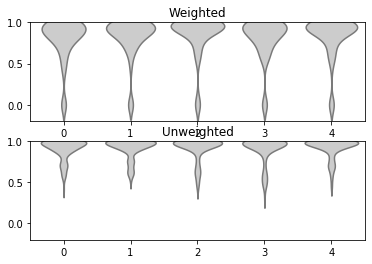

In [125]:
import pandas as pd 
data=pd.DataFrame(ER_corr[:,10:15])
data1=pd.DataFrame(MS_corr[:,10:15])
fig, axs = plt.subplots(2,1)
sns.violinplot( data=data,inner=None, color=".8",ax=axs[0])
axs[0].set_title('Weighted')
sns.violinplot( data=data1,inner=None, color=".8",ax=axs[1])
axs[1].set_title('Unweighted')
axs[0].set_ylim(-0.2,1)
axs[1].set_ylim(-0.2,1)

Unweighted graphs correlations are higher. Weighted graphs are more diverse; so their correlation distrubuted. We can see smaller
correlations. 

### Calculating MEAN and STD for ER Graphs

In [78]:
ER_corr_mean=ER_corr.mean(axis=1)
ER_corr_std=ER_corr.std(axis=1)

MS_corr_mean=MS_corr.mean(axis=1)
MS_corr_std=MS_corr.std(axis=1)




In [83]:
ER_corr_mean_matrix=np.empty([len(CMs),len(CMs)])
for i in range(len(CMs)):
    for j in range(len(CMs)):
        ER_corr_mean_matrix[j][i]=ER_corr_mean[i+j]
        
ER_corr_std_matrix=np.empty([len(CMs),len(CMs)])
for i in range(len(CMs)):
    for j in range(len(CMs)):
        ER_corr_std_matrix[i][j]=ER_corr_std[i+j]

MS_corr_mean_matrix=np.empty([len(CMs),len(CMs)])
for i in range(len(CMs)):
    for j in range(len(CMs)):
        MS_corr_mean_matrix[i][j]=MS_corr_mean[i+j]
MS_corr_mean_matrix

MS_corr_std_matrix=np.empty([len(CMs),len(CMs)])
for i in range(len(CMs)):
    for j in range(len(CMs)):
        MS_corr_std_matrix[i][j]=MS_corr_std[i+j]



Text(0.5, 6.0, 'Spearman Correlation std across weighted networks')

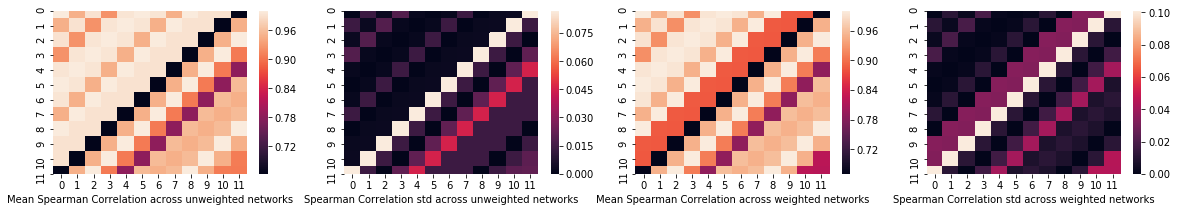

In [85]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(20, 3)
sns.heatmap(MS_corr_mean_matrix,ax=axs[0])
axs[0].set_xlabel('Mean Spearman Correlation across unweighted networks')
sns.heatmap(MS_corr_std_matrix,ax=axs[1])
axs[1].set_xlabel('Spearman Correlation std across unweighted networks')
sns.heatmap(ER_corr_mean_matrix,ax=axs[2])
axs[2].set_xlabel('Mean Spearman Correlation across weighted networks')
sns.heatmap(ER_corr_std_matrix,ax=axs[3])
axs[3].set_xlabel('Spearman Correlation std across weighted networks')

Methods used on unweighted graphs seem highly correlated and we can realize that std and mean inverse of eachother. 

Text(0.5, 1.0, 'Unweighted')

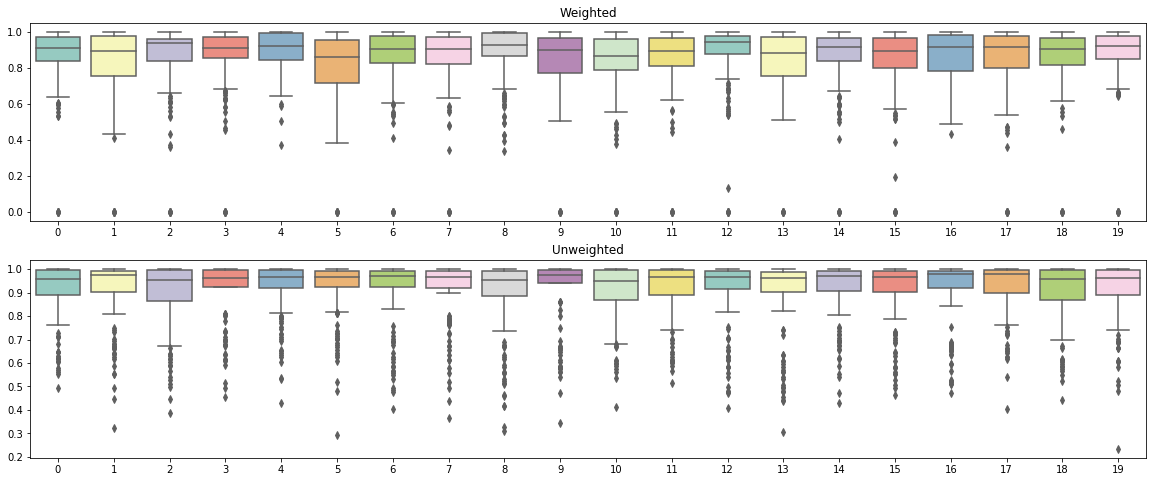

In [126]:
import pandas as pd
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(20, 8)
sns.boxplot(data=ER_corr, palette="Set3",ax=axs[0])
axs[0].set_title('Weighted')
sns.boxplot(data=MS_corr, palette="Set3",ax=axs[1])
axs[1].set_title('Unweighted')

## Part C: Association between mean within-network Centrality Measure Correlation(CMC) and network properties 


In [210]:
ER_MCMCs = np.mean(ER_corr, axis=0) 
ER_MCMCs.shape

(20,)

In [211]:
MS_MCMCs = np.mean(MS_corr, axis=0) 
MS_MCMCs.shape

(20,)

In [212]:
MS_assortavity={}
for x in range (0,20):
    MS_assortavity[x]=nx.degree_assortativity_coefficient(MS[x])
MS_density={}
for x in range (0,20):
    MS_density[x]=nx.density(MS[x])
ER_assortavity={}
for x in range (0,20):
    ER_assortavity[x]=nx.degree_assortativity_coefficient(ER[x])
ER_density={}
for x in range (0,20):
    ER_density[x]=nx.density(ER[x])

In [213]:
data = list(ER_assortavity.values()) 
ER_assortavity = np.array(data) 
data = list(ER_density.values()) 
ER_density = np.array(data) 
data = list(MS_assortavity.values()) 
MS_assortavity = np.array(data)
data = list(MS_density.values()) 
MS_density = np.array(data)

In [214]:
ER_density.shape

(20,)

In [215]:
ER_MCMCs

array([0.83480965, 0.81269844, 0.83176445, 0.83505756, 0.89890149,
       0.79837829, 0.82537855, 0.83339056, 0.87200337, 0.82757132,
       0.8025219 , 0.8258012 , 0.8489634 , 0.81100663, 0.83374577,
       0.81769597, 0.86300299, 0.82213922, 0.83038728, 0.85185988])

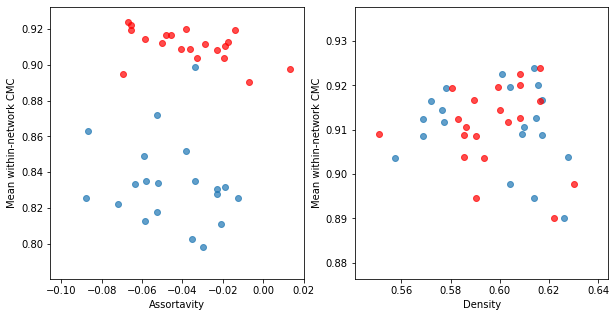

In [221]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axs[0].scatter(ER_assortavity, ER_MCMCs, alpha=0.7)
axs[0].scatter(MS_assortavity, MS_MCMCs, c='red', alpha=0.7)
axs[0].set_xlabel('Assortavity')
axs[0].set_ylabel('Mean within-network CMC')
axs[1].scatter(ER_density, MS_MCMCs,alpha=0.7)
axs[1].scatter(MS_density, MS_MCMCs,  c='red', alpha=0.7)
axs[1].set_xlabel('Density')
axs[1].set_ylabel('Mean within-network CMC')
plt.show()



In weighted networks, weighted assortativity explained the most variance in network CMCs.

## Conclusion
    1.20 weighted and 20 unweighted graphs were used for experiments. 

    2.Weigthed graphs are produced as Erdos Renyi.

    3. Maslov-Sneppen graphs used these ER graphs.
    
    4. Centrality measures on unweighted graphs are more correlated; but we must select low correlated methods for unique information from graphs. 
    
    5. Some weighted graphs can be more correlated. It is about the CM methods. Some metthods can be independent of weights. 
    
    6. Graphs include 50 nodes because of computational probalems; so I couldunt acquire diverse graphs it made difficult analysis. 